# COMP0213: Object-Oriented Programming for Robotics and AI - Exercises

## Lab Session on 18 - Nov - 2025
By Daniel Tozadore

---


# Pandas & Matplotlib Practice Notebook — With Solutions & Method Hints

---

Data preparation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

np.random.seed(2025)

---
## Part 1 — Pandas Basics 
---

### Task 1

Considering the code below:

In [4]:
# Customers (100 rows)
n_customers = 100
customer_ids = np.arange(1001, 1001 + n_customers)
first_names = np.array(["Alex","Sam","Chris","Taylor","Jordan","Morgan","Riley","Cameron","Casey","Jamie"]) 
last_names = np.array(["Smith","Jones","Brown","Taylor","Williams","Davies","Evans","Wilson","Thomas","Roberts"]) 
full_names = [f"{np.random.choice(first_names)} {np.random.choice(last_names)}" for _ in range(n_customers)]
ages = np.random.randint(18, 75, size=n_customers)
cities = np.random.choice(["London","Bristol","Manchester","Leeds","Birmingham","Cardiff","Glasgow"], size=n_customers)



* Create the Dataframe "customers" using the lists/arrays/dictionary: customer_id, full_names, ages, and cities. (Hint: use the pd.DataFrame() method)
* Print the dataframe "customers"

Your output should look like:

```python
--- customers ---
    customer_id           name  age     city
0         1001   Chris Thomas   50  Cardiff
1         1002  Taylor Taylor   70  Cardiff
2         1003     Alex Evans   23  Cardiff
3         1004   Casey Davies   63    Leeds
4         1005     Sam Thomas   52  Bristol
```

In [7]:
# TODO 
customers = pd.DataFrame({
    
    "customer_id" : customer_ids,
    "name" : full_names,
    "age" : ages,
    "city" : cities
})

print(customers.head())

   customer_id           name  age     city
0         1001   Chris Thomas   50  Cardiff
1         1002  Taylor Taylor   70  Cardiff
2         1003     Alex Evans   23  Cardiff
3         1004   Casey Davies   63    Leeds
4         1005     Sam Thomas   52  Bristol


### Task 2 - OOP concepts

Create a class named "Customer_Handler" that contains the following elements: 
* The init method that:
    * Receives a dataframe as argument and stores it as a private variable named "customers"
    * Keep track of the number of customers with the private variable "__n_customers"
* __print_customer(self)__: A method that prints the private dataframe "customer"
* __generate_new_customer(self)->dict{}__:A method that generates a new fake data (entire row) of a customer and returns it as a dictionary. Use the code above to create the lists. 

In [ ]:
# TODO: implement you code below

class Customer_Handler:
    """Class to handle customer data operations."""

    first_names = np.array(["Alex","Sam","Chris","Taylor","Jordan","Morgan","Riley","Cameron","Casey","Jamie"]) 
    last_names = np.array(["Smith","Jones","Brown","Taylor","Williams","Davies","Evans","Wilson","Thomas","Roberts"]) 

    def __init__(self,dataframe ):
        self.__customers = dataframe
        self.__n_customers = len(dataframe)

    def generate_new_customer(self):
        new = {
            "customer_id" : max(self.__customers["customer_id"]) +  1,
            "name" : np.random.choice(first_names) + " " + np.random.choice(last_names),            
            "age" : np.random.randint(18, 75),
            "city" : np.random.choice(["London","Bristol","Manchester","Leeds","Birmingham","Cardiff","Glasgow"])
        }
        return new
    
    def print_customers(self):
        print(self.__customers.tail())




In [13]:
# Testing the class

CusHandler = Customer_Handler(customers)
print("Average age of customers:", CusHandler.print_customers())

print("New customer data:", CusHandler.generate_new_customer())



    customer_id            name  age        city
95         1096     Jamie Smith   66     Bristol
96         1097   Cameron Brown   59  Manchester
97         1098  Taylor Roberts   38  Birmingham
98         1099   Jordan Taylor   25       Leeds
99         1100    Jordan Evans   65       Leeds
Average age of customers: None
New customer data: {'customer_id': 1101, 'name': 'Morgan Roberts', 'age': 31, 'city': 'Leeds'}



### Task 3 - Adding more methods and pandas basics of inserting rows and columns

Copy and paste the code for your class in the code below and add the following methods:

* __get_customer(self, customer_id)__: A method (function) that returns a dataframe of the customer with the same id as the parameter.
    

* __add_customer(self)->new_id__: A method (function) that uses the output of the "generate_new_customer()" method and insert it into the dataframe customer and return the number of the new customer_id created. For that:
    * Don't forget to update the variable "__n_customer"
    * **Hint:** Use pd.concat([...]) or df.loc[new_index] = {...}

* __check_status(self)__: A method that creates another column "status" to check wheter the customer is active or inactive
    * You create another column in a dataframe by doing dataframe['new_column_name'] = new_values
    * All existing customers will be 'active' by default. 
    * Think about how to give the values a pandas Series with the same number of inputs as the customer number of the dataframe.

* __change_customer_city(self, customer_id, new_city)__:  A method that changes the customer city to the given new city. 
    * You can access the data in different ways: df.iloc[row, column]; df.loc[row, column], df.at[row, column], or df.iat[row, column], being:
        * loc: only work on index
        * iloc: work on position with integers
        * at: Get scalar values. It's a very fast loc
        * iat: Get scalar values. It's a very fast iloc






In [21]:
class Customer_Handler:
    """Class to handle customer data operations."""

    first_names = np.array(["Alex","Sam","Chris","Taylor","Jordan","Morgan","Riley","Cameron","Casey","Jamie"]) 
    last_names = np.array(["Smith","Jones","Brown","Taylor","Williams","Davies","Evans","Wilson","Thomas","Roberts"]) 

    def __init__(self,dataframe ):
        self.__customers = dataframe
        self.__n_customers = len(dataframe)

    def generate_new_customer(self):
        new = {
            "customer_id" : max(self.__customers["customer_id"]) +  1,
            "name" : np.random.choice(first_names) + " " + np.random.choice(last_names),            
            "age" : np.random.randint(18, 75),
            "city" : np.random.choice(["London","Bristol","Manchester","Leeds","Birmingham","Cardiff","Glasgow"])
        }
        return new
    
    def print_customers(self):
        print(self.__customers.tail())

    def get_customer(self, id):
        find = self.__customers["customer_id"] == id 
        # print(find) # makes a list of true and false to mask on
        result = self.__customers[find] # this would normally be a col name but here it's not string
        return result
    
    def add_customer(self):
        x = self.generate_new_customer()
        temp = pd.DataFrame([x])
        self.__customers = pd.concat([self.__customers, temp], ignore_index=True)
        self.__n_customers += 1
        return x["customer_id"]
    
    def check_status(self):
        temp = pd.Series(["active"]*len(self.__customers))
        self.__customers["status"] = temp

    def change_customer_city(self, id, city):
        find = self.__customer["customer_ids"] == id
        self.__customer.loc[find, "city"] = city #avoid iloc for future proofing
        

        


    



    

Testing you code: 

In [ ]:
CusHandler = Customer_Handler(customers)

new_id = CusHandler.add_customer()
print("Adding a customer:", new_id)

print("Checking new entries:", CusHandler.get_customer(new_id))


print("Checking status:", CusHandler.check_status())
print("Print dataframe (it should display the 'check' column)\n", CusHandler.print_customers())


Adding a customer: 1101
Checking new entries:      customer_id          name  age        city
100         1101  Taylor Evans   37  Birmingham
Checking status: None
     customer_id            name  age        city  status
96          1097   Cameron Brown   59  Manchester  active
97          1098  Taylor Roberts   38  Birmingham  active
98          1099   Jordan Taylor   25       Leeds  active
99          1100    Jordan Evans   65       Leeds  active
100         1101    Taylor Evans   37  Birmingham  active
Print dataframe (it should display the 'check' column)
 None


### Task 4 - Accessing, filtering, and deleting in rows and columns



* __delete_customer(self, customer_id)__: A method that deletes the given customer id information from the database.
    * You should do it in 2 steps:
        * First, finding the row's index that has the value you are looking for: df.[df['customer_id']=='customer_id].index
        * Use the df.drop(<<index(es) of the row(s) you want to delete>>) 


* __change_customer_status(self, customer_id, status)__: A method that, given a customer id and a status, change the customer's status to the given new status.
    * You should do it in 2 steps:
        * First, finding the row's index  that has the value you are looking for: df.[df['customer_id']=='customer_id].index
        * Change their value with an accessing method (iloc, loc, at, iat). E.g.: df.iloc[id, 'column_name']=new_value

* __change_city_status(self, city, status)__: A method that, given a city and a status, change all the status of the customers in the city to the given status.



* __get_customers_by_city(self, city_name)__: A method that returns a subsetting of the customer dataframe filtered by the given city.
    * Remember to use the function .copy() to get a copy of the private dataframe and be able to use it.


* __get_ids_and_names(self)__: A method that returns a subsetting dataframe (a copy) with only customers ids and names
    * There are two different ways of doing it: 
        * Using the DataFrame.drop(columns=[...]) speficifying the columns (by name) that you want to drop; or
        * Creating a new dataframe with a subsetting of the columns (by name) that we want to keep. For instance: new_df = pd.DataFrame(old_df['column_name1','column_name2',...])



In [25]:
class Customer_Handler:
    """Class to handle customer data operations."""

    first_names = np.array(["Alex","Sam","Chris","Taylor","Jordan","Morgan","Riley","Cameron","Casey","Jamie"]) 
    last_names = np.array(["Smith","Jones","Brown","Taylor","Williams","Davies","Evans","Wilson","Thomas","Roberts"]) 

    def __init__(self,dataframe ):
        self.__customers = dataframe
        self.__n_customers = len(dataframe)

    def generate_new_customer(self):
        new = {
            "customer_id" : max(self.__customers["customer_id"]) +  1,
            "name" : np.random.choice(first_names) + " " + np.random.choice(last_names),            
            "age" : np.random.randint(18, 75),
            "city" : np.random.choice(["London","Bristol","Manchester","Leeds","Birmingham","Cardiff","Glasgow"])
        }
        return new
    
    def print_customers(self):
        print(self.__customers.tail())

    def get_customer(self, id):
        find = self.__customers["customer_id"] == id 
        # print(find) # makes a list of true and false to mask on
        result = self.__customers[find] # this would normally be a col name but here it's not string
        return result
    
    def add_customer(self):
        x = self.generate_new_customer()
        temp = pd.DataFrame([x])
        self.__customers = pd.concat([self.__customers, temp], ignore_index=True)
        self.__n_customers += 1
        return x["customer_id"]
    
    def check_status(self):
        temp = pd.Series(["active"]*len(self.__customers))
        self.__customers["status"] = temp

    def change_customer_city(self, id, city):
        find = self.__customer["customer_ids"] == id # same masking
        self.__customer.loc[find, "city"] = city #avoid iloc for future proofing
        
    def delete_customer( self, id):
        find = self.__customers["customer_id"] == id
        temp = self.__customers[find].index
        self.__customers.drop(temp, inplace = True )
        self.__n_customers = len(self.__customers)

    def change_customer_status(self, id, s):
        find = self.__customers["customer_id"] == id 
        self.__customers.loc[find, "status"] = s #again, avoid iloc

    def change_city_status(self, c, s):
        find = self.__customers["city"] == c
        self.__customers.loc[find, "status"] = s #again, avoid iloc

    def get_customers_by_city(self, c):
        find = self.__customers["city"] == c
        result = self.__customers[find]
        return result
    
    def get_ids_and_names(self):
        result = self.__customers[["customer_id", "name"]]
        return result

        


    



    

Testing you code: 

In [39]:
CusHandler = Customer_Handler(customers)

new_id = CusHandler.add_customer()

print("Adding a customer:", new_id)
print(f'Deleting customer we just created. What a short life for {CusHandler.get_customer(new_id)["name"].iloc[0]}!')
# print("Checking new entries:", CusHandler.delete_customer(new_id))

CusHandler.delete_customer(new_id)
print("Checking deleted entry:", CusHandler.get_customer(new_id))
# Have you implemented an exception handling in here?? WHY NOT????


# Changing the status:
typed_id = int(input("Enter a customer ID to change their status: "))
CusHandler.change_customer_status(typed_id, 'inactive')
print("Checking new status:", CusHandler.get_customer(typed_id))


CusHandler.change_city_status('London', 'inactive')
print("Checking new status for London customers:\n", CusHandler.get_customers_by_city('London'))


# Finally
print("Getting all customer IDs and names:\n", CusHandler.get_ids_and_names())

Adding a customer: 1101
Deleting customer we just created. What a short life for Cameron Jones!
Checking deleted entry: Empty DataFrame
Columns: [customer_id, name, age, city]
Index: []
Checking new status: Empty DataFrame
Columns: [customer_id, name, age, city, status]
Index: []
Checking new status for London customers:
     customer_id             name  age    city    status
6          1007  Morgan Williams   31  London  inactive
10         1011        Sam Smith   60  London  inactive
16         1017     Jamie Davies   49  London  inactive
19         1020  Morgan Williams   51  London  inactive
28         1029       Alex Brown   73  London  inactive
30         1031      Riley Evans   48  London  inactive
45         1046   Cameron Thomas   29  London  inactive
46         1047     Riley Davies   60  London  inactive
52         1053       Sam Taylor   56  London  inactive
54         1055     Riley Thomas   35  London  inactive
69         1070   Jamie Williams   33  London  inactive
82  


### Task 5 - Using sum and average


* __return_aged_sorted(self)__: A method that returns a copy f the customer dataset sorted by age
    * Use the method df.sort('column_name')
    * If yoy want, you can reindex the new values with the function 'df.reindex()'

* __get_customers_age_average(self)__: A method that returns the customers age average using the function '.mean()' 


* __count_customer_per_city(self, city)__: A method that returns a subsetting of the customer dataframe using the function '.group_by()' and '.sum()'



In [ ]:

class Customer_Handler:

    first_names = np.array(["Alex","Sam","Chris","Taylor","Jordan","Morgan","Riley","Cameron","Casey","Jamie"]) 
    last_names = np.array(["Smith","Jones","Brown","Taylor","Williams","Davies","Evans","Wilson","Thomas","Roberts"]) 

    def __init__(self,dataframe ):
        self.__customers = dataframe
        self.__n_customers = len(dataframe)

    def generate_new_customer(self):
        new = {
            "customer_id" : max(self.__customers["customer_id"]) +  1,
            "name" : np.random.choice(first_names) + " " + np.random.choice(last_names),            
            "age" : np.random.randint(18, 75),
            "city" : np.random.choice(["London","Bristol","Manchester","Leeds","Birmingham","Cardiff","Glasgow"])
        }
        return new
    
    def print_customers(self):
        print(self.__customers.tail())

    def get_customer(self, id):
        find = self.__customers["customer_id"] == id 
        # print(find) # makes a list of true and false to mask on
        result = self.__customers[find] # this would normally be a col name but here it's not string
        return result
    
    def add_customer(self):
        x = self.generate_new_customer()
        temp = pd.DataFrame([x])
        self.__customers = pd.concat([self.__customers, temp], ignore_index=True)
        self.__n_customers += 1
        return x["customer_id"]
    
    def check_status(self):
        temp = pd.Series(["active"]*len(self.__customers))
        self.__customers["status"] = temp

    def change_customer_city(self, id, city):
        find = self.__customer["customer_ids"] == id # same masking
        self.__customer.loc[find, "city"] = city #avoid iloc for future proofing
        
    def delete_customer( self, id):
        find = self.__customers["customer_id"] == id
        temp = self.__customers[find].index
        self.__customers.drop(temp, inplace = True )
        self.__n_customers = len(self.__customers)

    def change_customer_status(self, id, s):
        find = self.__customers["customer_id"] == id 
        self.__customers.loc[find, "status"] = s #again, avoid iloc

    def change_city_status(self, c, s):
        find = self.__customers["city"] == c
        self.__customers.loc[find, "status"] = s #again, avoid iloc

    def get_customers_by_city(self, c):
        find = self.__customers["city"] == c
        result = self.__customers[find]
        return result
    
    def get_ids_and_names(self):
        result = self.__customers[["customer_id", "name"]]
        return result

    def return_aged_sorted(self):
        self.__customers.sort_values("age")
        self.__customers.reset_index(inplace=True, drop=True) #drop=True to avoid adding old index as a column, inplace=True to modify existing dataframe
        return self.__customers
    
    def get_customers_age_average(self):
        x = self.__customers["age"].mean()
        return x 
    
    def count_customers_per_city(self, c):
        temp = self.__customers.copy()
        temp["counter"] = 1
        grouped = temp.groupby("city")["counter"].sum()    
        print(grouped) # for debugging
        return grouped[c]
    

Testing you code: 

In [53]:
CusHandler = Customer_Handler(customers)


print("Printing before sorting:\n", CusHandler.print_customers())
CusHandler.return_aged_sorted()
print("Printing after sorting:\n", CusHandler.print_customers())


print("Average age of customers:", CusHandler.get_customers_age_average())
print("Number of customers per city:\n", CusHandler.count_customers_per_city('London'))


    customer_id            name  age        city
95         1096     Jamie Smith   66     Bristol
96         1097   Cameron Brown   59  Manchester
97         1098  Taylor Roberts   38  Birmingham
98         1099   Jordan Taylor   25       Leeds
99         1100    Jordan Evans   65       Leeds
Printing before sorting:
 None
    customer_id            name  age        city
95         1096     Jamie Smith   66     Bristol
96         1097   Cameron Brown   59  Manchester
97         1098  Taylor Roberts   38  Birmingham
98         1099   Jordan Taylor   25       Leeds
99         1100    Jordan Evans   65       Leeds
Printing after sorting:
 None
Average age of customers: 45.02
city
Birmingham    10
Bristol       15
Cardiff       17
Glasgow       11
Leeds         18
London        15
Manchester    14
Name: counter, dtype: int64
Number of customers per city:
 15



---
## Part 2 — Subsetting (Extra exercises)
---

 Data preparation

In [55]:
# Transactions (1,200 rows) across 2025
n_tx = 1200
start_date = pd.Timestamp("2025-01-01")
dates = start_date + pd.to_timedelta(np.random.randint(0, 365, size=n_tx), unit='D')
amount = np.round(np.random.normal(loc=20.0, scale=15.0, size=n_tx), 2)
category = np.random.choice(["groceries","transport","utilities","rent","entertainment","other"], size=n_tx, p=[0.25,0.2,0.15,0.1,0.2,0.1])
status = np.random.choice(["cleared","pending","failed"], size=n_tx, p=[0.8,0.18,0.02])

transactions = pd.DataFrame({
    "tx_id": np.arange(1, n_tx+1),
    "customer_id": np.random.choice(customer_ids, size=n_tx),
    "date": dates.normalize(), # normalize to remove time component
    "amount": amount,
    "category": category,
    "status": status,
})

transactions

,tx_id,customer_id,date,amount,category,status
0,1,1045,2025-08-24,18.17,other,cleared
1,2,1038,2025-03-28,13.44,utilities,cleared
2,3,1001,2025-05-14,17.47,transport,cleared
3,4,1055,2025-03-22,0.46,other,cleared
4,5,1018,2025-10-04,25.86,transport,cleared
...,...,...,...,...,...,...
1195,1196,1001,2025-06-21,37.46,entertainment,pending
1196,1197,1031,2025-03-04,22.13,transport,cleared
1197,1198,1069,2025-10-19,2.14,entertainment,pending
1198,1199,1031,2025-07-14,16.35,groceries,cleared


### 1. Basic filter: X == Y

> **Hint:** Use boolean indexing: df[df['col'] == value]

In [56]:
# TODO
# Filter transactions where status == 'pending'.

pending = transactions["status"] == "pending"
result_pending = transactions[pending]

### 2. Multiple conditions

> **Hint:** Use & (and) and | (or) with parentheses

In [58]:
# TODO
# Filter groceries AND amount > 0.
groceries_more_than_zero = (transactions["category"] == "groceries") & (transactions["amount"] > 0)
result_groceries = transactions[groceries_more_than_zero]

### 3. isin filter

> **Hint:** Use Series.isin([...])

In [59]:
# TODO
# Filter categories in ['rent','utilities'] using .isin()

multi_find = ["rent", "utilities"]
multi_find_mask = transactions["category"].isin(multi_find)   # mask for multiple find or == for single find
results_multi_find = transactions[multi_find_mask]

### 4. between

> **Hint:** Use Series.between(low, high, inclusive='both')

In [62]:
# TODO
# Customers aged between 30 and 50 inclusive; show name and age.
range_find = customers["age"].between(30, 50, inclusive = "both")
result_range_find = customers[range_find]
result_range_find = result_range_find[["name", "age"]]

### 5. query method

> **Hint:** Use DataFrame.query('expr')

In [64]:
# TODO
# amount < 0 and status == 'cleared'.
negative_cleared = transactions.query("amount < 0 and status == 'cleared'")
# result_negative_cleared = transactions[negative_cleared]   not needed as query already filters

### 6. Top-N after filtering

> **Hint:** Use DataFrame.nlargest(k, column)

In [65]:
# TODO
# Among entertainment transactions, return top 5 by amount desc.
n_largest_entertainment_mask = transactions["category"] == "entertainment"
n_largest_entertainment_mask_result = transactions[n_largest_entertainment_mask].nlargest(5, "amount")



### 7. Boolean mask reuse

> **Hint:** Build mask with .abs() and reuse it

In [67]:
# TODO
# Create mask where |amount| > 30 and compute mean of those amounts.
abs_more_than_30 = transactions["amount"].abs()> 30
abs_more_than_30_mean = transactions[abs_more_than_30]["amount"].mean()
print(abs_more_than_30_mean)

38.5049647887324


### 8. groupby sum

> **Hint:** Use df.groupby('col', as_index=False)['value'].sum()

In [68]:
# TODO
# Total amount per category sorted desc.
total_per_category = transactions.groupby("category")["amount"].sum()
total_per_category = total_per_category.sort_values(ascending=False)

### 9. groupby mean per customer

> **Hint:** Use groupby()+.mean() with a pre-filter

In [ ]:
# TODO
# Mean amount per customer for cleared transactions only.
clear_transactions = transactions["status"] == "cleared"
result_cleared = transactions[clear_transactions]
group_by_customer = result_cleared.groupby("customer_id")["amount"].mean()

### 10. aggregate multiple metrics

> **Hint:** Use groupby().agg(count='count', total='sum', mean='mean')

In [ ]:
# TODO
# For each category compute count, sum, mean of amount.
group_by_castegory = transactions.groupby("category")["amount"].agg(count="count", total = "sum", mean = "mean") # agg takes in dict of funcitions with new names and returns a dataframe

---
## Part 3 — Pandas Methods (Extra)
---

Data preparation

In [ ]:
# Sales (Products x Months)
np.random.seed(20251)
products = pd.DataFrame({
    "product_id": np.arange(2001, 2011),
    "product": [f"Product_{i:02d}" for i in range(1,11)],
    "category": np.random.choice(["A","B","C"], size=10)
})
months = pd.date_range("2025-01-01","2025-12-01", freq="MS")
sales_records = []
for _, p in products.iterrows():
    for m in months:
        sales_records.append({
            "product_id": p["product_id"],
            "month": m,
            "units": int(np.random.gamma(shape=5, scale=20)),
            "price": np.round(np.random.uniform(5, 50), 2)
        })
sales = pd.DataFrame(sales_records)


### 1. Sorting

> **Hint:** Use DataFrame.sort_values([...], ascending=[...])

In [71]:
# TODO
# Sort customers by city asc, age desc.
print(customers.head())

sorted_customers = customers.sort_values(by = ["city", "age"], ascending=[True, False])
print(sorted_customers.head())

   customer_id           name  age     city
0         1001   Chris Thomas   50  Cardiff
1         1002  Taylor Taylor   70  Cardiff
2         1003     Alex Evans   23  Cardiff
3         1004   Casey Davies   63    Leeds
4         1005     Sam Thomas   52  Bristol
    customer_id            name  age        city
73         1074    Jamie Wilson   64  Birmingham
34         1035   Alex Williams   60  Birmingham
22         1023     Casey Brown   55  Birmingham
70         1071  Cameron Wilson   55  Birmingham
7          1008      Alex Smith   50  Birmingham


### 2. fillna

> **Hint:** Use Series.fillna(value) and random index selection

In [ ]:
# TODO
# Inject ~5% NaN in amount then compare mean before/after fillna(0).
nan_random_indices = np.random.choice(transactions.index, size = len(transactions)//20, replace = False)
transactions.loc[nan_random_indices, "amount"] = np.nan
mean_before = transactions["amount"].mean()
transactions["amount"].fillna(0, inplace=True)
mean_after = transactions["amount"].mean()

print(mean_after, mean_before)


# trying again but with mean imputation
transactions.loc[nan_random_indices, "amount"] = np.nan
# filled in with nan values. now recalculate them with mean 
means = (transactions.loc[nan_random_indices-1, "amount"].values + transactions.loc[nan_random_indices+1, "amount"].values)/2 # have to use values to avoid setting with copy warning
print (means)
#fill in 
transactions.loc[nan_random_indices, "amount"] = means

14.268787499999998 15.072662852112675
[ 0.      1.515  35.995   5.89    9.015   4.845  36.01   28.91   18.45
 17.555  13.655  18.55   27.2425 42.725  17.64   21.095  32.37    8.635
 11.6725  0.      0.         nan 19.855  25.2025 16.6775 13.32   32.78
  0.      7.1825     nan 22.78   19.91   29.905   4.34   17.625  -1.145
  9.125   8.15   19.7175 26.19   11.57   31.41   11.8175     nan 24.18
 21.69   -7.86   12.12   41.53   15.145  -0.54   21.255  24.025  28.41
     nan 16.11    0.      9.465  10.205  18.975 ]


C:\Users\HP Victus\AppData\Local\Temp\ipykernel_56752\1280012949.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions["amount"].fillna(0, inplace=True)


### 3. dropna

> **Hint:** Use DataFrame.dropna(subset=[...])

In [ ]:
# TODO
# From the NaN-injected copy, drop rows with NaN in amount and show shape.

#because we have already filled in the NaN values above, we need to re-inject them
nan_random_indices = np.random.choice(transactions.index, size = len(transactions)//20, replace = False)
transactions.loc[nan_random_indices, "amount"] = np.nan
transactions_dropped = transactions.dropna(subset=["amount"])

### 4. drop_duplicates

> **Hint:** Use DataFrame.drop_duplicates(keep=...)

In [82]:
# TODO
# Create tiny df with duplicates; drop with different keep options.
### tiny_df = pd.DataFrame(np.random.choice(transactions, size = 10, replace = False)) error here
tiny_df = np.random.choice(transactions.index, size = 10, replace = True) # will create duplicates
tiny_df = transactions.loc[tiny_df]

tiny_df.drop_duplicates(keep = "first")

print(tiny_df)

      tx_id  customer_id       date  amount       category   status
484     485         1047 2025-12-19   25.54      transport  pending
1094   1095         1071 2025-09-16   36.90      transport  cleared
813     814         1086 2025-04-12    0.00      transport  cleared
604     605         1092 2025-06-13   26.24      groceries  cleared
27       28         1012 2025-01-12   -2.78      utilities  cleared
1189   1190         1034 2025-02-24   -0.31      utilities  cleared
619     620         1044 2025-09-14   22.78  entertainment  cleared
615     616         1100 2025-03-16   25.52      transport  cleared
631     632         1053 2025-04-19   -6.84      transport  cleared
995     996         1003 2025-08-22    0.00           rent  cleared


### 5. apply (column-wise)

> **Hint:** Use Series.apply(lambda x: ...)

In [ ]:
# TODO
# New column 'sign': credit if amount>0 else debit.
# Use the function apply with a custom function for that. It should work column-wise.

transactions["sign"] = transactions["amount"].apply(lambda x: "credit" if x > 0 else "debit") #.apply takes one function and applies it to each element in the series
print (transactions.tail(n = 10))

      tx_id  customer_id       date  amount       category   status    sign
1190   1191         1068 2025-08-29    6.66      groceries  pending  credit
1191   1192         1091 2025-05-07    0.00          other  pending   debit
1192   1193         1024 2025-06-07   15.89      transport  cleared  credit
1193   1194         1025 2025-02-25    0.00      groceries  pending   debit
1194   1195         1005 2025-05-14    0.00      utilities  cleared   debit
1195   1196         1001 2025-06-21   37.46  entertainment  pending  credit
1196   1197         1031 2025-03-04   22.13      transport  cleared  credit
1197   1198         1069 2025-10-19   19.24  entertainment  pending  credit
1198   1199         1031 2025-07-14   16.35      groceries  cleared  credit
1199   1200         1012 2025-11-16   27.24      groceries  pending  credit


### 6. apply (row-wise)

> **Hint:** Use DataFrame.apply(func, axis=1)

In [ ]:
# TODO
# Build label like 'cleared:groceries' or 'pending:rent'.
# Same, but now is row-wise (with axis=1.)

#transactions["label"] = transactions["status"] + ":" + transactions["category"]
transactions["lable"] = transactions.apply(lambda x: (x["status"]+ ":" + x["category"]), axis=1) # you must .apply on whole dataframe for row-wise
print(transactions.tail(n = 10))

      tx_id  customer_id       date  amount       category   status    sign  \
1190   1191         1068 2025-08-29    6.66      groceries  pending  credit   
1191   1192         1091 2025-05-07    0.00          other  pending   debit   
1192   1193         1024 2025-06-07   15.89      transport  cleared  credit   
1193   1194         1025 2025-02-25    0.00      groceries  pending   debit   
1194   1195         1005 2025-05-14    0.00      utilities  cleared   debit   
1195   1196         1001 2025-06-21   37.46  entertainment  pending  credit   
1196   1197         1031 2025-03-04   22.13      transport  cleared  credit   
1197   1198         1069 2025-10-19   19.24  entertainment  pending  credit   
1198   1199         1031 2025-07-14   16.35      groceries  cleared  credit   
1199   1200         1012 2025-11-16   27.24      groceries  pending  credit   

                      lable  
1190      pending:groceries  
1191          pending:other  
1192      cleared:transport  
1193      

### 7. Summarizing with describe

> **Hint:** Use Series.describe()

In [94]:
# TODO
# Describe the distribution of amount.
desc = transactions["amount"].describe()
print(desc)

count    1196.000000
mean       15.079797
std        14.609371
min       -35.330000
25%         0.000000
50%        14.075000
75%        25.547500
max        63.090000
Name: amount, dtype: float64


---
## Part 4 — Matplotlib: Handling X and Y Axis (10 exercises)
---
Data Preparation

In [ ]:
# Time series demo (daily)
ts = pd.DataFrame({
    "date": pd.date_range("2025-01-01","2025-12-31", freq="D"), # dates for full year
    "y": np.cumsum(np.random.normal(0, 1, 365))  #cumsum defines a random walk
})

print(ts.head())
# print("Datasets ready: customers, transactions, sales, ts")
# for name, df in [("customers", customers.head()), ("transactions", transactions.head()), ("sales", sales.head()), ("ts", ts.head())]:
#     print("\n---", name, "---\n", df)

        date         y
0 2025-01-01  0.223402
1 2025-01-02  0.525513
2 2025-01-03 -0.100192
3 2025-01-04 -1.250590
4 2025-01-05 -1.761660


### 1. Basic line plot

> **Hint:** Use plt.plot(x, y), plt.title(), plt.xlabel(), plt.ylabel()

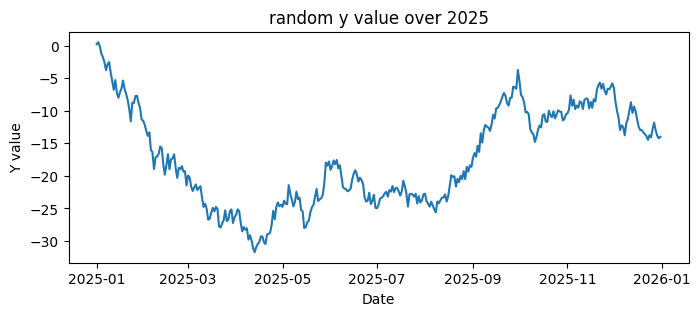

In [99]:
# Plot ts as a line with labels and title.

plt.figure(figsize=(8,3)) 
plt.plot(ts["date"], ts["y"])
plt.xlabel("Date")
plt.ylabel("Y value")
plt.title("random y value over 2025")
plt.show()

### 2. Date formatting

> **Hint:** Use matplotlib.dates MonthLocator, DateFormatter; fig.autofmt_xdate()

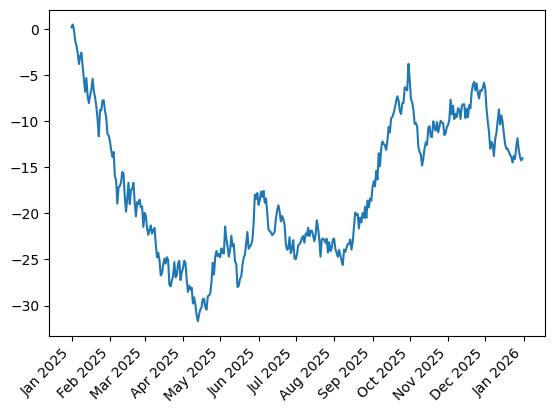

In [ ]:
# TODO
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Format ticks as 'Mon YYYY' and rotate labels
fig, ax = plt.subplots()
ax.plot(ts["date"], ts["y"])
ax.xaxis.set_major_locator(mdates.MonthLocator()) # one tick per month
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
fig.autofmt_xdate(rotation = 45)
plt.show()

### 3. Axis limits

> **Hint:** Use ax.set_xlim() and ax.set_ylim() with quantiles

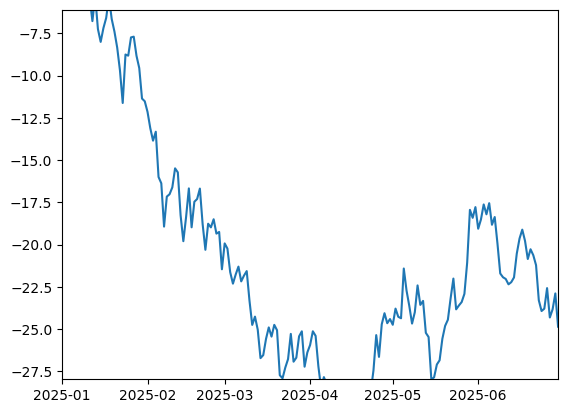

In [105]:
# TODO
# First half of the year and y-limits at 5th/95th percentiles.

fig, ax = plt.subplots()
ax.plot(ts['date'], ts['y'])
ax.set_xlim(ts['date'].min(), ts['date'].min().replace(month=6, day=30)
)  # First half of the year
ax.set_ylim(ts['y'].quantile(0.05), ts['y'].quantile(0.95))  
plt.show()




### 4. Custom ticks

> **Hint:** Use ax.xaxis.set_major_locator(MonthLocator) and set_major_formatter()

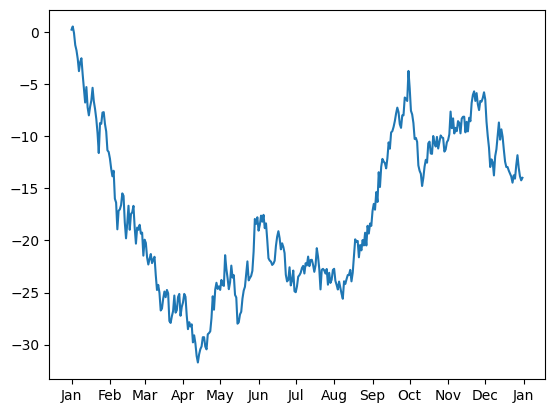

In [ ]:
# TODO
# Set monthly ticks labelled by month abbreviation.
fig , ax = plt.subplots()
ax.plot(ts['date'], ts['y'])
ax.xaxis.set_major_locator(mdates.MonthLocator()) # go to func def for into on parameters
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b')) # month abbreviation, avaliable formats in doc
plt.show()

### 5. Grid and legend

> **Hint:** Use plt.grid(alpha=...) and plt.legend()

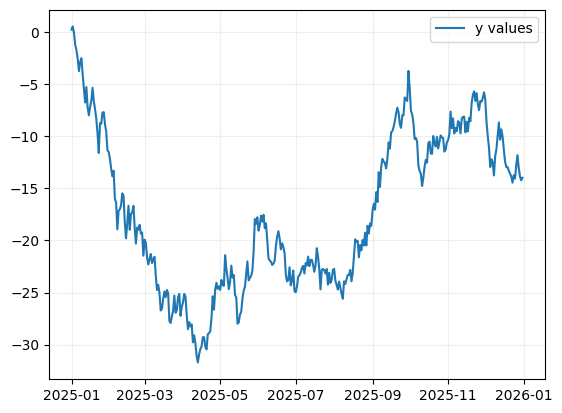

In [ ]:
# TODO
# Add grid and legend to your line plot.
fig, ax = plt.subplots()
ax.plot(ts['date'], ts['y'])
ax.grid(alpha=0.2) # opacity
ax.legend(["y values"])
plt.show()

---
# That's it! 

### Thank you for you effort. 

---
Dani.